Initializing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# load the data
CC_data_raw = pd.read_csv("fraudTrain.csv")

In [3]:
#lets see few rows from the data
CC_data_raw.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Handling the data

In [4]:
#chech the missing values
CC_data_raw.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
#handling duplicate values
CC_data_raw.drop_duplicates(inplace= True)

# Data Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

In [7]:
#lets set the figure size
sns.set(rc = {'figure.figsize':(15,8)})

Transaction amount vs Fraud

In [8]:
CC_data_raw.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Text(0.5, 1.0, 'Transection vs Fraud')

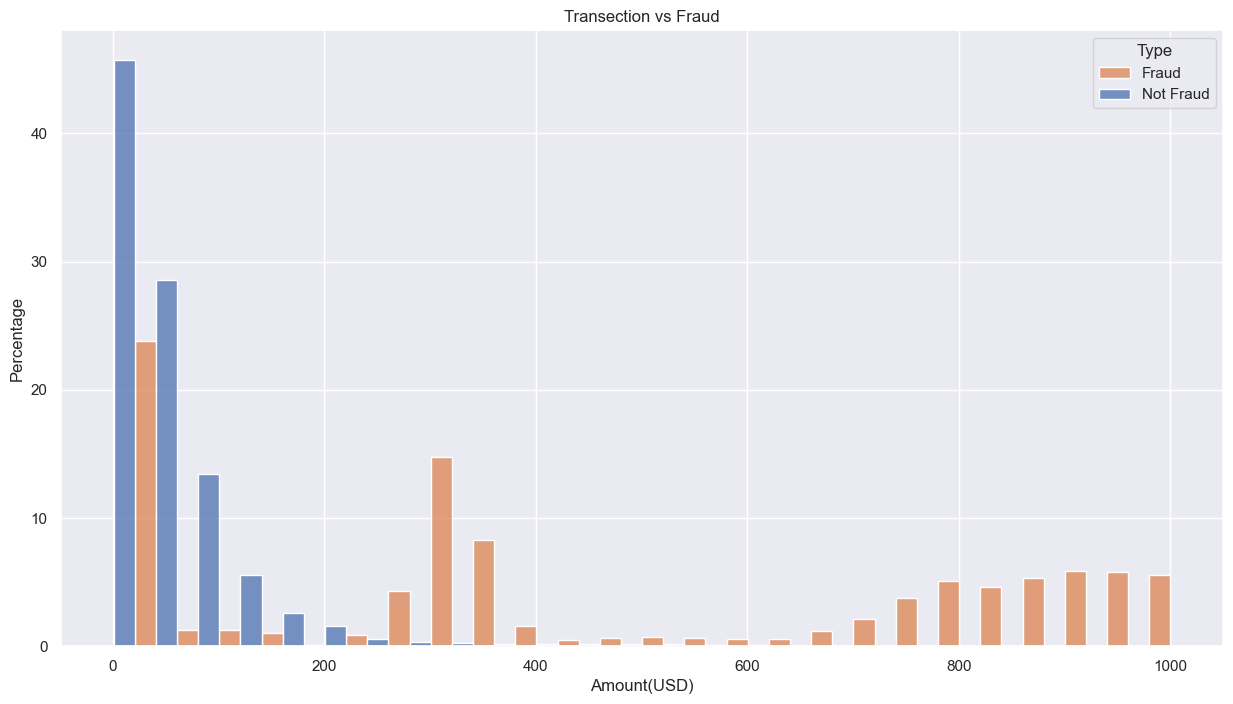

In [9]:
TvF = sns.histplot(x='amt', data=CC_data_raw[CC_data_raw.amt <= 1000], hue="is_fraud", stat="percent", multiple="dodge", common_norm=False, bins=25)
TvF.set_ylabel("Percentage")
TvF.set_xlabel("Amount(USD)")
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.title("Transection vs Fraud")

Gender vs Fraud

Text(0.5, 1.0, 'Gender vs Fraud')

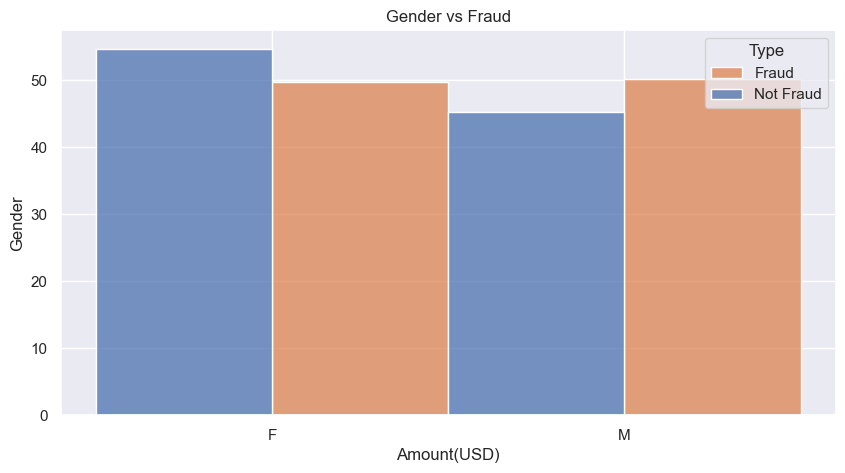

In [10]:
sns.set(rc = {'figure.figsize':(10,5)})
GvF = sns.histplot(x='gender', data=CC_data_raw, hue="is_fraud", stat="percent", multiple="dodge", common_norm=False)
GvF.set_ylabel("Gender")
GvF.set_xlabel("Amount(USD)")
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.title("Gender vs Fraud")

Age vs Fraud

In [11]:
# calculating age from the DOB given in the data
# store calculate age in new column called "age"

import datetime as dt

CC_data_raw['age'] = dt.datetime.today().year - pd.to_datetime(CC_data_raw['dob']).dt.year
print(CC_data_raw['age'])

0          35
1          45
2          61
3          56
4          37
           ..
1296670    62
1296671    44
1296672    56
1296673    43
1296674    28
Name: age, Length: 1296675, dtype: int64


Text(0.5, 1.0, 'Age vs Fraud')

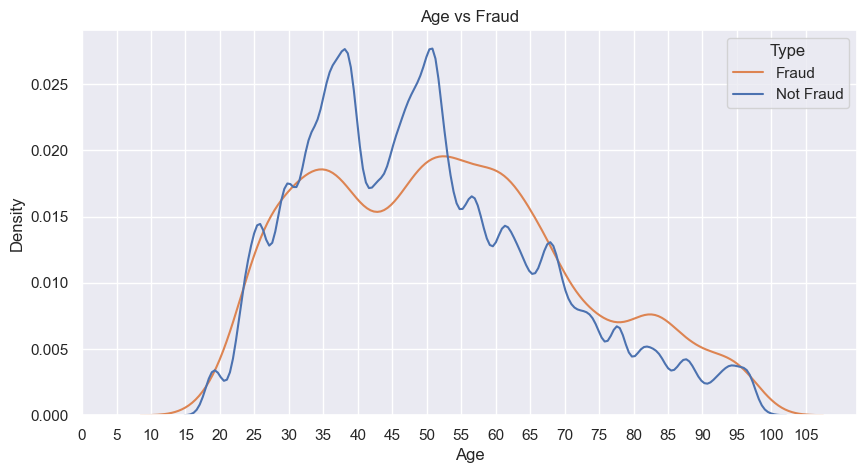

In [12]:
AvF = sns.kdeplot(x='age', data=CC_data_raw, hue="is_fraud", common_norm=False)
AvF.set_xlabel("Age")
AvF.set_ylabel("Density")
plt.xticks(np.arange(0,110,5))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.title("Age vs Fraud")

Category vs Fraud

In [13]:
print(CC_data_raw[['category','is_fraud']])

              category  is_fraud
0             misc_net         0
1          grocery_pos         0
2        entertainment         0
3        gas_transport         0
4             misc_pos         0
...                ...       ...
1296670  entertainment         0
1296671    food_dining         0
1296672    food_dining         0
1296673    food_dining         0
1296674    food_dining         0

[1296675 rows x 2 columns]


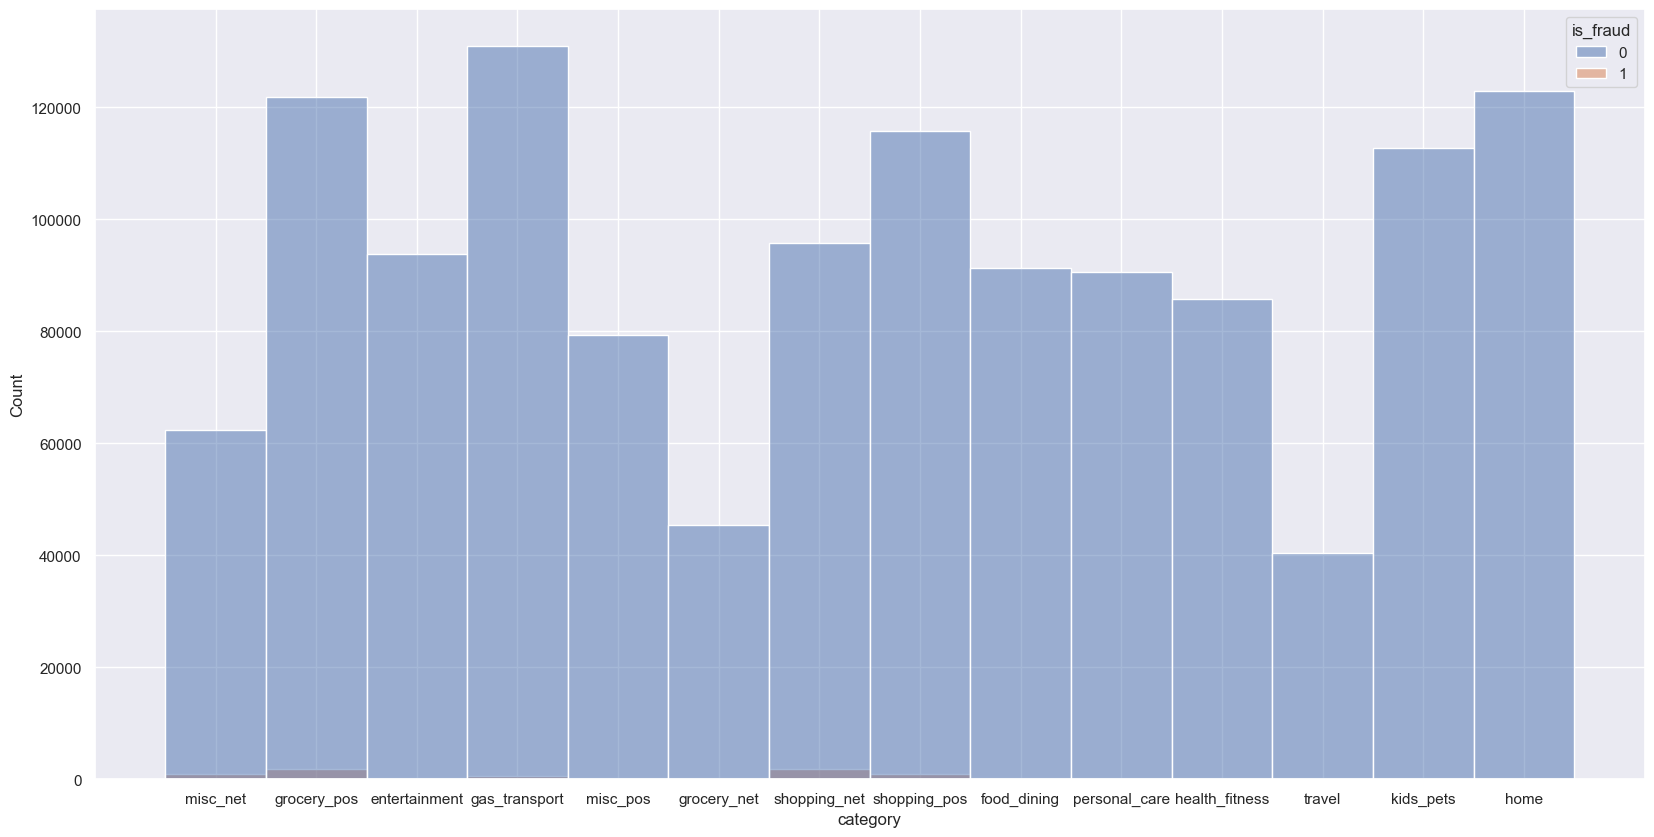

In [14]:
sns.set({'figure.figsize':(20,10)})
CvF = sns.histplot(x='category', data=CC_data_raw, hue="is_fraud", common_norm=False)

Day vs Fraud

C:\Users\Admin\AppData\Local\Temp\ipykernel_23872\4179034718.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  DvF.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


Text(0, 0.5, 'Percentage')

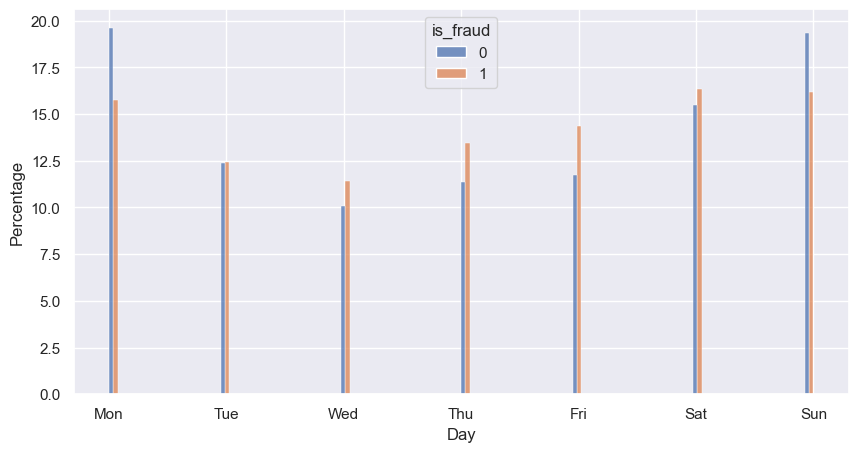

In [15]:
#convert date time to day
CC_data_raw['day'] = pd.to_datetime(CC_data_raw['trans_date_trans_time']).dt.day_of_week
# sns.set(rc={'figure:figsize':(10,5)})
sns.set(rc={'figure.figsize':(10,5)})

DvF = sns.histplot(CC_data_raw, x='day', hue='is_fraud', common_norm=False, multiple= 'dodge', stat='percent')
# DvF.set_xticklables(["", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
DvF.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
DvF.set_xlabel("Day")
DvF.set_ylabel("Percentage")

# Data Modeling

In [16]:
CC_data_raw['month'] = pd.to_datetime(CC_data_raw["trans_date_trans_time"]).dt.month
CC_data_raw['hour'] = pd.to_datetime(CC_data_raw["trans_date_trans_time"]).dt.hour
# print(CC_data_raw['month'])
# print(CC_data_raw['hour'])

In [17]:
CC_data_raw.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age', 'day', 'month', 'hour'],
      dtype='object')

In [18]:
#create a df of data which model need to train
Train_data_raw = CC_data_raw[['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long','age', 'hour', 'day', 'month', 'is_fraud']]

#create dummy values out of it
Train_data = pd.get_dummies(Train_data_raw, drop_first=True)
y_train = Train_data['is_fraud'].values
X_train = Train_data.drop("is_fraud", axis='columns').values
print(y_train)
print(X_train)
print("Created training data sucessfully")


[0 0 0 ... 0 0 0]
[[4.97000e+00 2.86540e+04 3.60788e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.07230e+02 9.91600e+04 4.88878e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.20110e+02 8.32520e+04 4.21808e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [1.05930e+02 8.83250e+04 3.29396e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [7.49000e+01 5.77560e+04 4.33526e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [4.30000e+00 5.98710e+04 4.58433e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]
Created training data sucessfully


Adjusting testing data as the training data

In [19]:
CC_data_raw_test = pd.read_csv("fraudTest.csv")
CC_data_raw_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [20]:
#needs to add 'age', 'hour', 'day', 'month' to the data

CC_data_raw_test['age'] = dt.datetime.today().year - pd.to_datetime(CC_data_raw_test['dob']).dt.year
CC_data_raw_test['month'] = pd.to_datetime(CC_data_raw_test["trans_date_trans_time"]).dt.month
CC_data_raw_test['hour'] = pd.to_datetime(CC_data_raw_test["trans_date_trans_time"]).dt.hour
CC_data_raw_test['day'] = pd.to_datetime(CC_data_raw_test['trans_date_trans_time']).dt.day_of_week

In [21]:
Test_data_raw = CC_data_raw_test[['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long','age', 'hour', 'day', 'month', 'is_fraud']]
Test_data = pd.get_dummies(Test_data_raw, drop_first=True)
y_test = Test_data['is_fraud'].values
X_test = Test_data.drop('is_fraud', axis='columns').values
print(y_test)
print(X_test)
print("adjusted testing data sucessfully")

[0 0 0 ... 0 0 0]
[[2.86000e+00 2.92090e+04 3.39659e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.98400e+01 8.40020e+04 4.03207e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [4.12800e+01 1.17100e+04 4.06729e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [8.68800e+01 9.93230e+04 4.61966e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [7.99000e+00 8.36430e+04 4.46255e+01 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 [3.81300e+01 7.30340e+04 3.56665e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]
adjusted testing data sucessfully


# Model Prediction

Logistic regression

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
method = SMOTE()
X_resample, y_resample = method.fit_resample(X_train, y_train)
model1 = LogisticRegression()
model1.fit(X_resample, y_resample)
predicted1= model1.predict(X_test)


In [24]:
print('Classification report:\n', classification_report(y_test, predicted1))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted1)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.05      0.75      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719

Confusion matrix:
 [[524627  28947]
 [   534   1611]]
Share of Non-Fraud in Test Data: 0.9961


Random forest

In [25]:
# from sklearn.ensemble import RandomForestClassifier

In [26]:
# model2 = RandomForestClassifier(random_state=5)
# model2.fit(X_resample, y_resample)
# predicted2=model2.predict(X_test)

In [27]:
# print('Classification report:\n', classification_report(y_test, predicted2))
# conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted2)
# print('Confusion matrix:\n', conf_mat)
# print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),6))